2022-12-12 09:59:26.479 - [INFO] base_model._build_model(572): Start building Single Particle Model with electrolyte
2022-12-12 09:59:26.543 - [INFO] base_battery_model.build_model(1019): Finish building Single Particle Model with electrolyte
2022-12-12 09:59:26.545 - [INFO] parameter_values.process_model(371): Start setting parameters for Single Particle Model with electrolyte
2022-12-12 09:59:26.660 - [INFO] parameter_values.process_model(474): Finish setting parameters for Single Particle Model with electrolyte
2022-12-12 09:59:26.663 - [INFO] discretisation.process_model(149): Start discretising Single Particle Model with electrolyte
2022-12-12 09:59:26.670 - [INFO] discretisation.remove_independent_variables_from_rhs(1199): removing variable Discharge capacity [A.h] from rhs
2022-12-12 09:59:26.978 - [INFO] discretisation.process_model(271): Finish discretising Single Particle Model with electrolyte
2022-12-12 09:59:26.979 - [INFO] base_solver.solve(703): Start solving Single Part

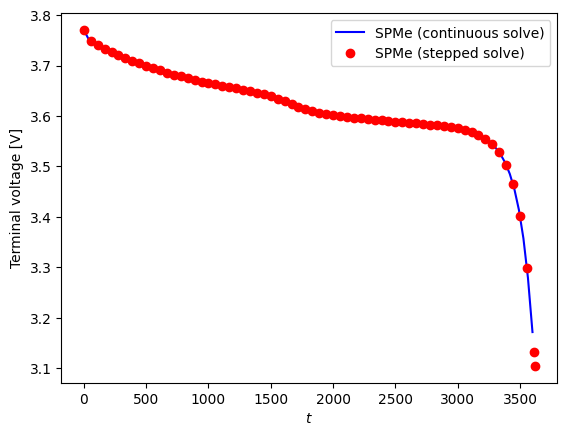

In [1]:
#
# Example to compare solving for all times against stepping individually
#
import pybamm
import numpy as np
import matplotlib.pyplot as plt

pybamm.set_logging_level("INFO")

# load model
model = pybamm.lithium_ion.SPMe()

# create geometry
geometry = model.default_geometry

# load parameter values and process model and geometry
param = model.default_parameter_values
param.process_model(model)
param.process_geometry(geometry)

# set mesh
mesh = pybamm.Mesh(geometry, model.default_submesh_types, model.default_var_pts)

# discretise model
disc = pybamm.Discretisation(mesh, model.default_spatial_methods)
disc.process_model(model)

# solve model
t_eval = np.linspace(0, 3600, 100)
solver = pybamm.CasadiSolver()
solution = solver.solve(model, t_eval)

# step model
dt = 500
time = 0
timescale = model.timescale_eval
end_time = solution.t[-1] * timescale
step_solver = pybamm.CasadiSolver()
step_solution = None
while time < end_time:
    step_solution = step_solver.step(step_solution, model, dt=dt, npts=10)
    time += dt

# plot
time_in_seconds = solution["Time [s]"].entries
step_time_in_seconds = step_solution["Time [s]"].entries
voltage = solution["Terminal voltage [V]"].entries
step_voltage = step_solution["Terminal voltage [V]"].entries
plt.plot(time_in_seconds, voltage, "b-", label="SPMe (continuous solve)")
plt.plot(step_time_in_seconds, step_voltage, "ro", label="SPMe (stepped solve)")
plt.xlabel(r"$t$")
plt.ylabel("Terminal voltage [V]")
plt.legend()
plt.show()

In [4]:
timescale 
end_time

3600.0